In [1]:
import numpy as np
from sklearn import linear_model, metrics
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
file_path = "./drive/MyDrive/AI/Email Spam Detction/data/emails.csv"
data = pd.read_csv(file_path)
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X = data.iloc[:, 1:3001]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
#  1. LogisticRegression
log_reg_params = {'C': [0.1, 0.2, 0.3, 0.4, 0.5]}
LR = LogisticRegression(solver= 'liblinear')
search = GridSearchCV(LR, log_reg_params, scoring='precision', cv=3)
search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5]}, scoring='precision')

In [5]:
best_LR = search.best_estimator_
best_LR

LogisticRegression(C=0.5, solver='liblinear')

In [6]:
y_pred_LR = best_LR.predict(X_test)

# Take the prediction probabilities matrix and give 0 prediction for values below 0.6 probability,
# and 1 for higher than 0.6 probability values.

y_pred_LR_upd = best_LR.predict_proba(X_test)
y_pred_LR_upd = np.where(y_pred_LR_upd[:, 1] < 0.6, 0, 1)
metrics.confusion_matrix(y_test, y_pred_LR)

array([[892,  21],
       [ 14, 366]])

Test_Accuracy:  0.974
Test_Precision:  0.953
Recall:  0.961


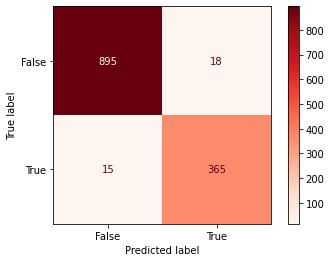

In [7]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_LR_upd)
Precision = metrics.precision_score(y_test, y_pred_LR_upd)
Recall = metrics.recall_score(y_test, y_pred_LR_upd)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LR_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(cmap=plt.cm.Reds)
plt.show()

In [8]:
# 2․ RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120, criterion='entropy')
rf_params = {'max_depth': range(12, 24, 3), 'min_samples_split': range(3, 13, 2)}
rf_search = GridSearchCV(rf, rf_params, scoring='average_precision', cv=3)
rf_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=120),
             param_grid={'max_depth': range(12, 24, 3),
                         'min_samples_split': range(3, 13, 2)},
             scoring='average_precision')

In [9]:
best_rf = rf_search.best_estimator_
best_rf

RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_split=7,
                       n_estimators=120)

In [10]:
y_pred_RF = best_rf.predict(X_test)

y_pred_RF_upd = best_rf.predict_proba(X_test)
y_pred_RF_upd = np.where(y_pred_RF_upd[:, 1] < 0.48, 0, 1)
metrics.confusion_matrix(y_test, y_pred_RF)

array([[894,  19],
       [ 18, 362]])

Test_Accuracy:  0.97
Test_Precision:  0.936
Recall:  0.963


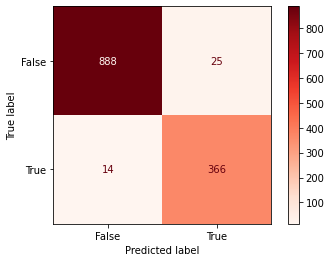

In [11]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_RF_upd)
Precision = metrics.precision_score(y_test, y_pred_RF_upd)
Recall = metrics.recall_score(y_test, y_pred_RF_upd)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')

metrics.confusion_matrix(y_test, y_pred_RF)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_RF_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(cmap=plt.cm.Reds)
plt.show()

In [12]:
#  3. MLPClassifier

mlp_search = MLPClassifier( max_iter=3000)

mlp_search.fit(X_train, y_train)
mlp_search.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
y_pred_mlp = mlp_search.predict(X_test)

y_pred_mlp_upd = mlp_search.predict_proba(X_test)
y_pred_mlp_upd = np.where(y_pred_mlp_upd[:, 1] < 0.55, 0, 1)

metrics.confusion_matrix(y_test, y_pred_mlp)

array([[895,  18],
       [  9, 371]])

Test_Accuracy:  0.978
Test_Precision:  0.954
Recall:  0.974


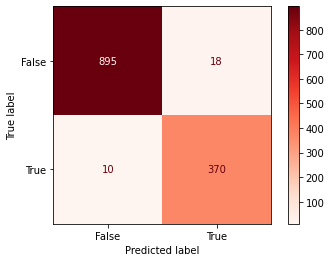

In [14]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_mlp_upd)
Precision = metrics.precision_score(y_test, y_pred_mlp_upd)
Recall = metrics.recall_score(y_test, y_pred_mlp_upd)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mlp_upd)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(cmap=plt.cm.Reds)
plt.show()

In [15]:
# Try to reduce the number of correct emails predicted as spam combining the results 
# of LogisticRegression, RandomForestClassifier and  MLPClassifier algorithms

y_pred_final = np.copy(y_pred_LR_upd)
for i in range(y_pred_final.size):
    if y_pred_RF_upd[i] == 0 or y_pred_mlp_upd[i] == 0:
        y_pred_final[i] = 0   

Test_Accuracy:  0.975
Test_Precision:  0.989
Recall:  0.926


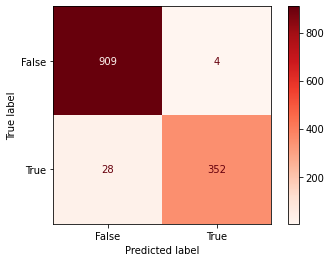

In [16]:
Test_Accuracy = metrics.accuracy_score(y_test, y_pred_final)
Precision = metrics.precision_score(y_test, y_pred_final)
Recall = metrics.recall_score(y_test, y_pred_final)
print(f'Test_Accuracy:  {round(Test_Accuracy, 3)}\nTest_Precision:  {round(Precision, 3)}\nRecall:  {round(Recall, 3)}')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_final)
sm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
sm_display.plot(cmap=plt.cm.Reds)
plt.show()